#Build a Simple Neural Network Using PyTorch

In [ ]:
import torch
import torch.nn as nn

### Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### Data Preparation

Now we will define variables like input size, hidden unit, output size, batch size, and the learning rate.

In [ ]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

We will now randomly initialize the dummy input and the output target data (or tensor)as follows:



In [ ]:
data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

We initialized the input data with 100 data samples with 10 features each and respectively initialized the output data with 100 data points.

In [ ]:
print(data_x.size())
print(data_y.size())


torch.Size([100, 10])
torch.Size([100, 1])


### Define Neural Network Model

Using in-built functions, we will create the simple sequential model with output sigmoid layer as follows:

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of NeuralNetwork, and move it to the device, and print its structure.

In [ ]:
Model = NeuralNetwork().to(device)
print(Model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


Next, we will define the loss function and the optimizer for gradient descent. Under the nn package, there are several different loss function. Here we will usenn.MSELoss as the loss function of the model which computes the mean-squared error between the input and the target. Similarly, torch.optim package provides various optimization algorithms

In [ ]:
loss_function = nn.MSELoss() 
optimizer = torch.optim.Adam(Model.parameters(), lr=learning_rate)

### Training Loop

Here, we will define the training loop with the following steps:

- Forward propagation — compute the predicted y and calculate the current loss
- Backward propagation — after each epoch we set the gradients to zero before starting to do backpropagation
- Gradient descent — Finally, we will update model parameters by calling optimizer.step() function

In [ ]:
losses = []
for epoch in range(5000):
    pred_y = Model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    Model.zero_grad()
    loss.backward()

    optimizer.step()

### Output

We can plot the loss and see how the model is training over each epoch.

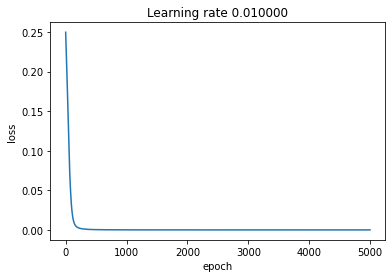

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

We can see the loss is decreasing in each epoch which shows that the parameters are being learned.

In this tutorial, you learned a step-by-step approach to developing a simple neural network model in PyTorch

In [ ]:
torch.manual_seed(1729)
X = torch.randn(batch_size, n_input)
#print(X)
Y_pred = Model(X)
print(f"Predicted y: {Y_pred}")
y_class = Y_pred.argmax()
print(f"Predicted class: {y_class}")

Predicted y: tensor([[2.2170e-01],
        [6.9888e-01],
        [9.7825e-01],
        [9.9999e-01],
        [8.2974e-02],
        [9.9925e-01],
        [9.9888e-01],
        [9.9999e-01],
        [9.9231e-01],
        [9.9987e-01],
        [9.9681e-01],
        [6.0791e-06],
        [4.4389e-03],
        [3.3177e-03],
        [1.5800e-08],
        [5.7545e-03],
        [9.9962e-01],
        [4.2617e-06],
        [9.5150e-01],
        [9.7891e-01],
        [7.4509e-01],
        [9.9240e-01],
        [1.0000e+00],
        [7.7365e-01],
        [6.9146e-01],
        [1.0000e+00],
        [1.0000e+00],
        [9.9999e-01],
        [2.0585e-04],
        [6.7853e-04],
        [1.0512e-03],
        [1.0000e+00],
        [9.8134e-01],
        [9.9996e-01],
        [4.1234e-01],
        [4.7470e-01],
        [7.5892e-03],
        [1.0000e+00],
        [4.3780e-03],
        [8.8298e-01],
        [1.0000e+00],
        [8.2672e-11],
        [6.3793e-01],
        [3.9130e-04],
        [1.0000e+00